# Intercorrélation

In [1]:
from myst_nb import glue
import numpy as np
import matplotlib.pyplot as plt

## Définition

L'intercorrélation de deux signaux $x(t)$ et $y(t)$ est un signal $R_{xy}(\tau)$ qui mesure la ressemblance du signal $x$ décalé de $\tau$ $x(t+\tau)$ avec $y(t)$. Elle est définie par :

* en temps continu : $\quad\displaystyle R_{xy}(\tau) = \int_{-\infty}^{+\infty} x(t+\tau) y(t) dt$
* en temps discret : $\quad\displaystyle R_{xy}[m] = \sum_{n=-\infty}^{+\infty} x[n+m] y[n]$

Attention, la formule de l'intercorrélation est très proche de celle de la convolution puisque seul un signe change ! Malgré cela, l'intercorrélation et la convolution sont deux outils très différents et dont l'interprétation n'est pas du tout la même.

## Exemples

<div class="example">

    
En communications numériques, il n'est pas rare que le récepteur du sytème de communication reçoive un signal de l'émetteur qui soit très brouillé (on dit qu'il est _bruité_). Par exemple, si le récepteur reçoit le signal $x$ représenté {numref}`F:intercorrelation:communications`, et qu'il sait qu'il devrait être une suite d'échelon d'amplitude &minus;1 (représentant le bit 0) ou +1 (représentant le bit 1), alors l'intercorrélation de $x$ avec un échelon $y$ permet de détecter à chaque instant si le signal reçu ressemble à $y$ (dans ce cas, on a reçu un 1) ou pas (on a reçu un 0).

```{glue:figure} G:intercorrelation:communications
:name: "F:intercorrelation:communications"

Intercorrélation de $x$ avec $y$. Le signal $x$ véhicule le message 10011010 codé en NRZ avec le motif y.
```

</div>

<div class="example">

Un autre exemple d'utilisation de l'intecorrélation est la mesure de la fréquence d'un signal. Si on dispose d'un signal sinusoïdal $x$, mais qu'il est très bruité et que l'on cherche sa fréquence inconnue, alors on peut représenter l'intercorrélation de $x$ avec plusieurs sinusoïdes $y$ dont on connaît la fréquence. La sinusoïde qui permet d'obtenir la plus grande intercorrélation sera la plus ressemblante : on pourra alors en déduire la valeur de la fréquence inconnue. Ce principe est illustré {numref}`F:intercorrelation:sinusoide`.

```{glue:figure} G:intercorrelation:sinusoide
:name: "F:intercorrelation:sinusoide"

Intercorrélation de $x$ avec $y$. Le signal $x$ est une sinusoïde bruitée de fréquence 0,5 Hz.
```
    
</div>

/home/miv/mazet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/home/miv/mazet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


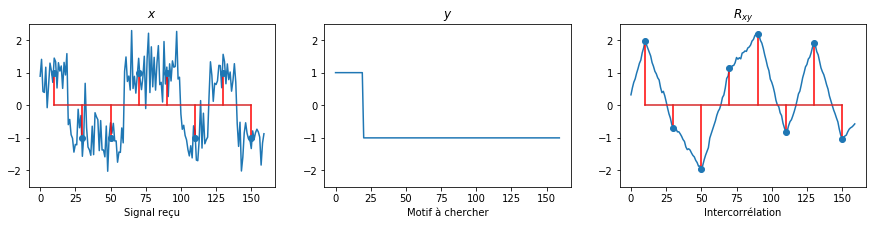

In [2]:
# Communications numériques

# Message
msg = np.array([1, 0, 0, 1, 1, 0, 1, 0])

# Forme d'onde
L = 20
L2 = round(L/2)
h = np.ones(L)

# Temps & instants d'échantillonnage
N = len(msg) * L
n = np.arange(0,N)
idx = n[L2::L]

# Signal émis
m = 2*msg - 1
x = np.kron(m, h)

# Signal reçu (bruité)
b = np.random.normal(0, .5, x.shape)
y = x + b

# Forme d'onde sur n
m = 2*np.array([1, 0, 0, 0, 0, 0, 0, 0])-1
h = np.kron(m, h)

# Intercorrélation
z = np.correlate(y, h, mode="full")
z = z[N-L2-1:-L2] / L

# Affichage
ylim = [-2.5, 2.5]
fig = plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
plt.plot(n,y)
plt.stem(n[idx], x[idx], "r")
plt.title('$x$')
plt.xlabel('Signal reçu')
plt.ylim(ylim)
plt.subplot(1,3,2)
plt.plot(n,h)
plt.title('$y$')
plt.xlabel('Motif à chercher')
plt.ylim(ylim)
plt.subplot(1,3,3)
plt.plot(n, z)
plt.stem(n[idx], z[idx], "r")
plt.title("$R_{xy}$")
plt.xlabel('Intercorrélation')
plt.ylim(ylim)
plt.show()

glue("G:intercorrelation:communications", fig, display=False)

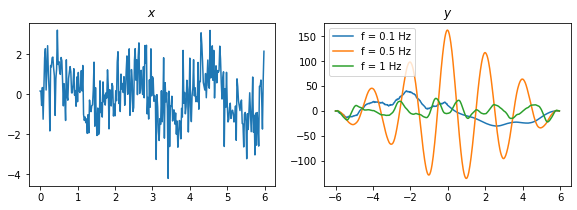

In [3]:
# Sinusoïde

# Fréquences
freqs = [.1, .5, 1]

# Temps
N = 300
Te = 1/50
t = np.arange(0,N) * Te
u = np.arange(-N,N-1) * Te

# Signal bruité
x = np.sin(2*np.pi*freqs[1]*t)
b = np.random.normal(0, 1, x.shape)
y = x + b

# Affichage
fig = plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
plt.plot(t,y)
plt.title('$x$')
ax = plt.subplot(1,3,2)
for f in freqs:
    w = np.sin(2*np.pi*f*t)
    z = np.correlate(y, w, mode="full")
    ax.plot(u, z, label=f"f = {f} Hz")
ax.legend()
plt.title('$y$')
plt.show()

glue("G:intercorrelation:sinusoide", fig, display=False)

## Autocorrélation

L'autocorrélation est l'intercorrélation d'un signal avec lui-même :

* en temps continu : $\quad\displaystyle R_{x}(\tau) = \int_{-\infty}^{+\infty} x(t+\tau) x(t) dt$
* en temps discret : $\quad\displaystyle R_{x}[m] = \sum_{n=-\infty}^{+\infty} x[n+m] x[n]$

L'autocorrélation possède quelques propriétés remarquables :
* l'autocorrélation est symétrique car $R_{x}(\tau) = R_{x}(-\tau)$ (reprendre la définition en effectuant un changement de variable)
* l'autocorrélation en 0 est la valeur maximale de l'autocorrélation (puisque c'est pour un décalage nul $T=0$ que le signal se ressemble le plus à lui-même. C'est par ailleurs l'énergie du signal :

  $$
    R_{x}(0) = \int_{-\infty}^{+\infty} x(t)^2 dt
  $$
  
* L'autocorrélation d'un signal périodique de période $T$ est également périodique de période $T$ (puisqu'en décalant le signal de $T$, il ressemble à nouveau avec lui-même)